In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import napari
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from napari.utils.notebook_display import nbscreenshot

from napari_sediment.spectral_indices_widget import SpectralIndexWidget
plt.style.use('default')

# Spectral indices

After having pre-processed the image, proceeded with spectral reduction and identified end-members, we can finally quantify spectra using indices via the ```SpectralIndexWidget```:

In [24]:
viewer =napari.Viewer()
self = SpectralIndexWidget(viewer)
viewer.window.add_dock_widget(self);

In [25]:
export_folder = Path('/Users/gw18g940/Desktop/Test_data/Zahajska/synthetic/export/synthetic1_out2/')
self._on_click_select_export_folder(export_folder=export_folder)
self.import_project()
#self._on_click_select_all()
self.viewer.layers['imcube'].visible = False

## Main

In the main tab we select once again our export data folder. Clicking on load project will load both the image and the end-member spectra.

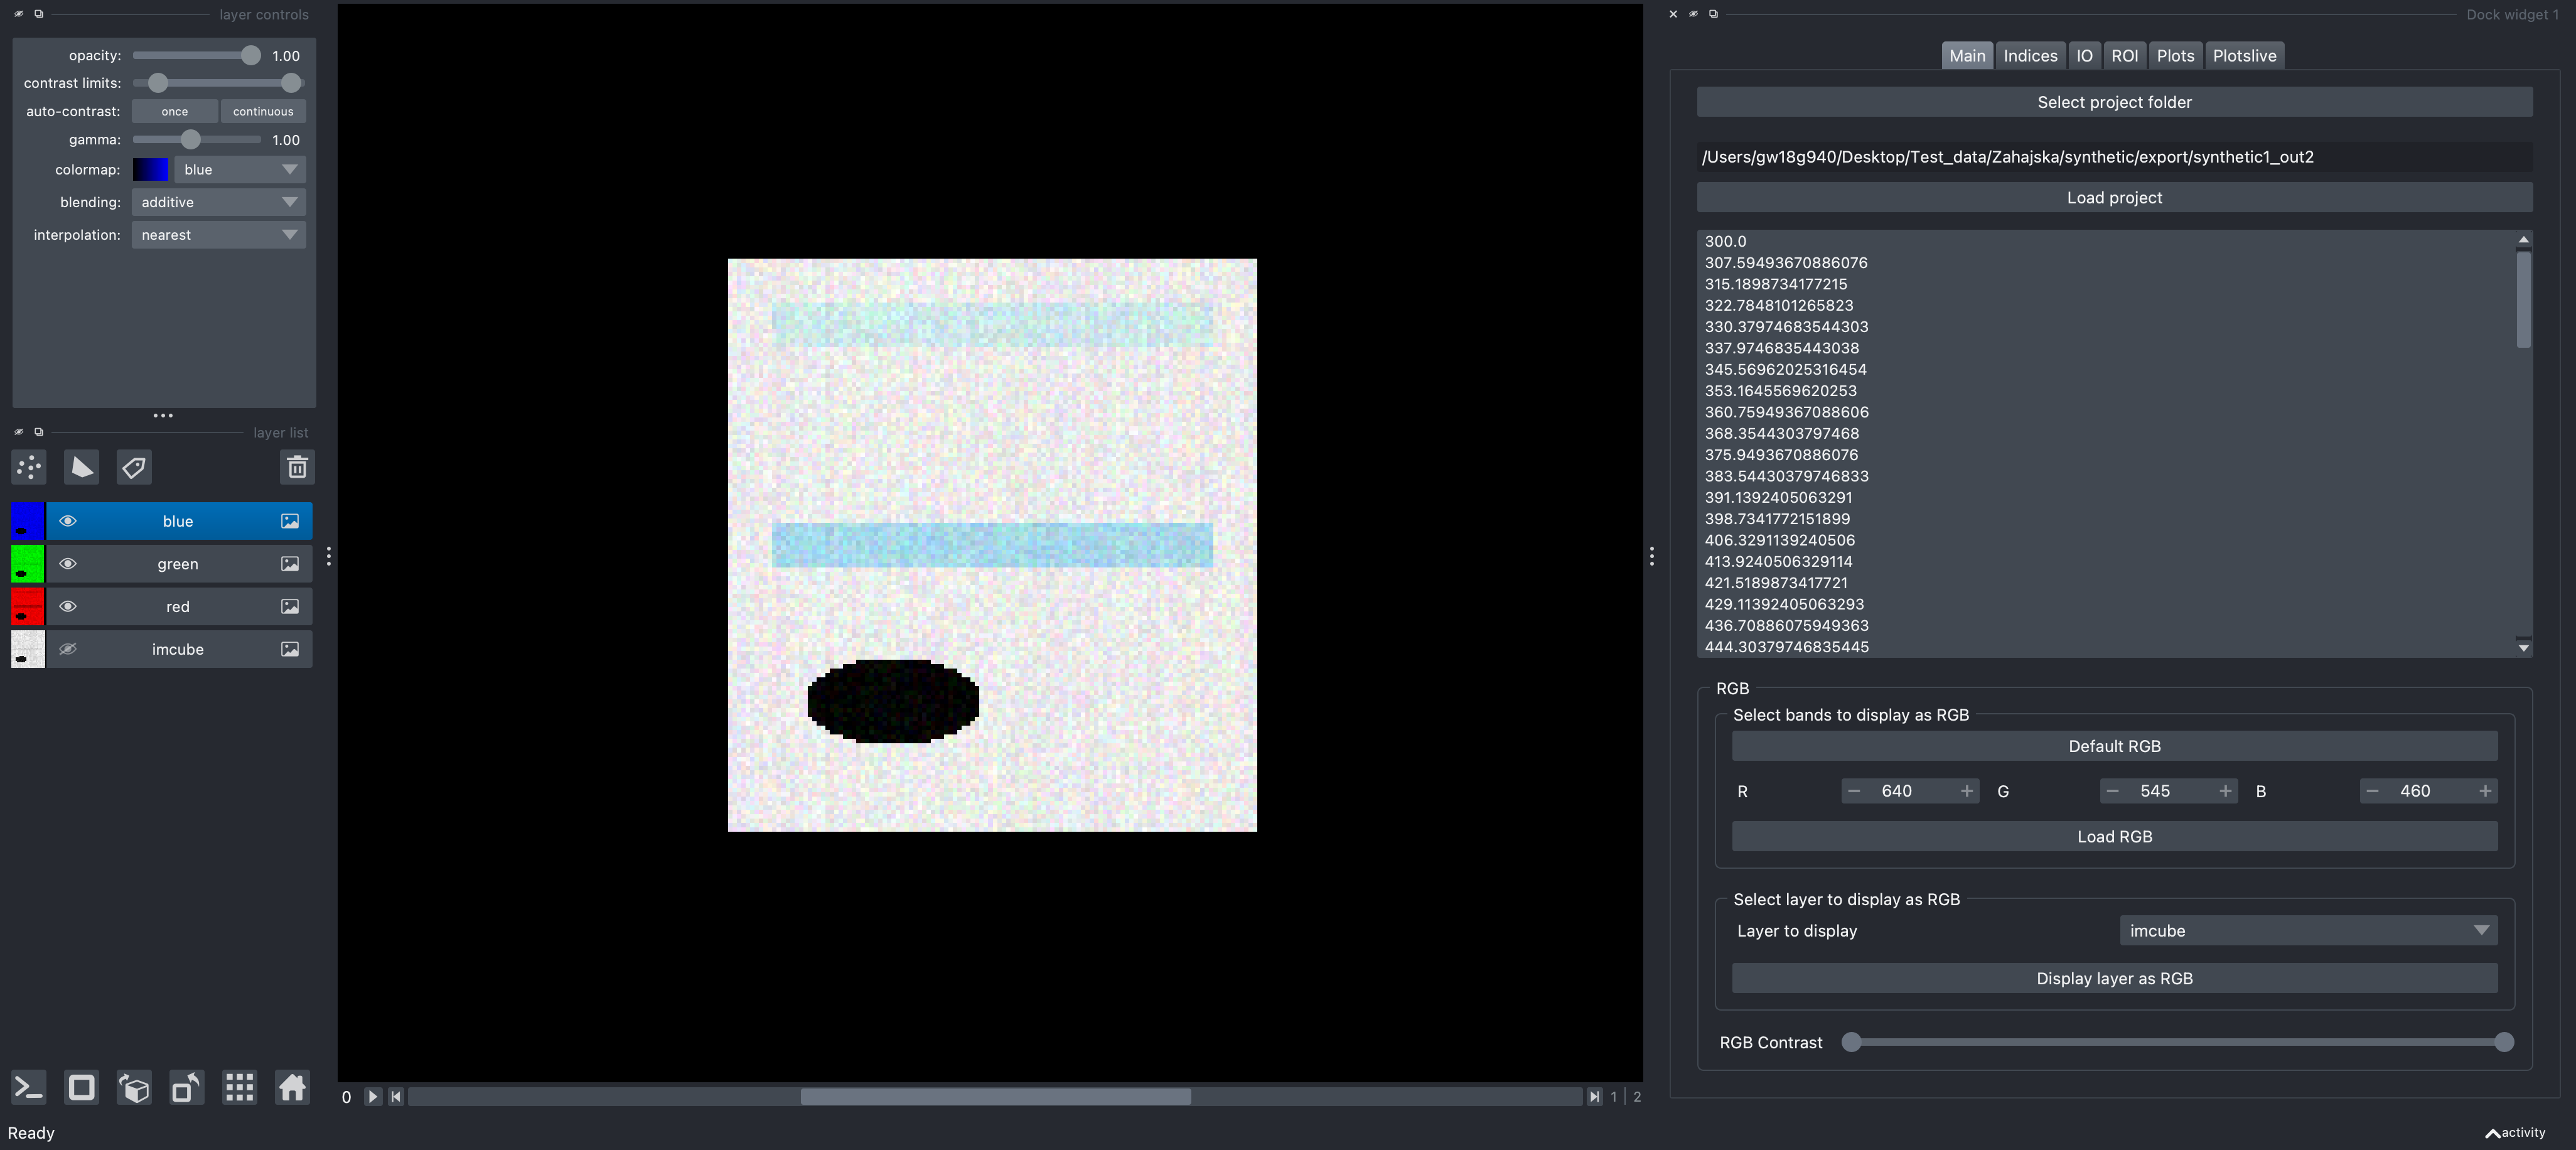

In [26]:
nbscreenshot(viewer)

Again, one needs to select the location of the data. Images are loaded in zarr format so they can be browsed through.

### Indices

In this tab, one can define and compute various indices. In the indices section, a series of indices have been preset to use certain combinations of wavelengths. Those can be adjusted either by entering values or by dragging the sliders below the plot. Once adjustments have been made, one can keep those for the the selected index name (```Update current index```) or a new name can be defined (```New index```):

In [27]:
self.spin_index_left.setValue(550)
self.spin_index_middle.setValue(600)
self.spin_index_right.setValue(650)

self.qtext_new_index_name.setText('Myindex')
self._on_click_new_index(None)

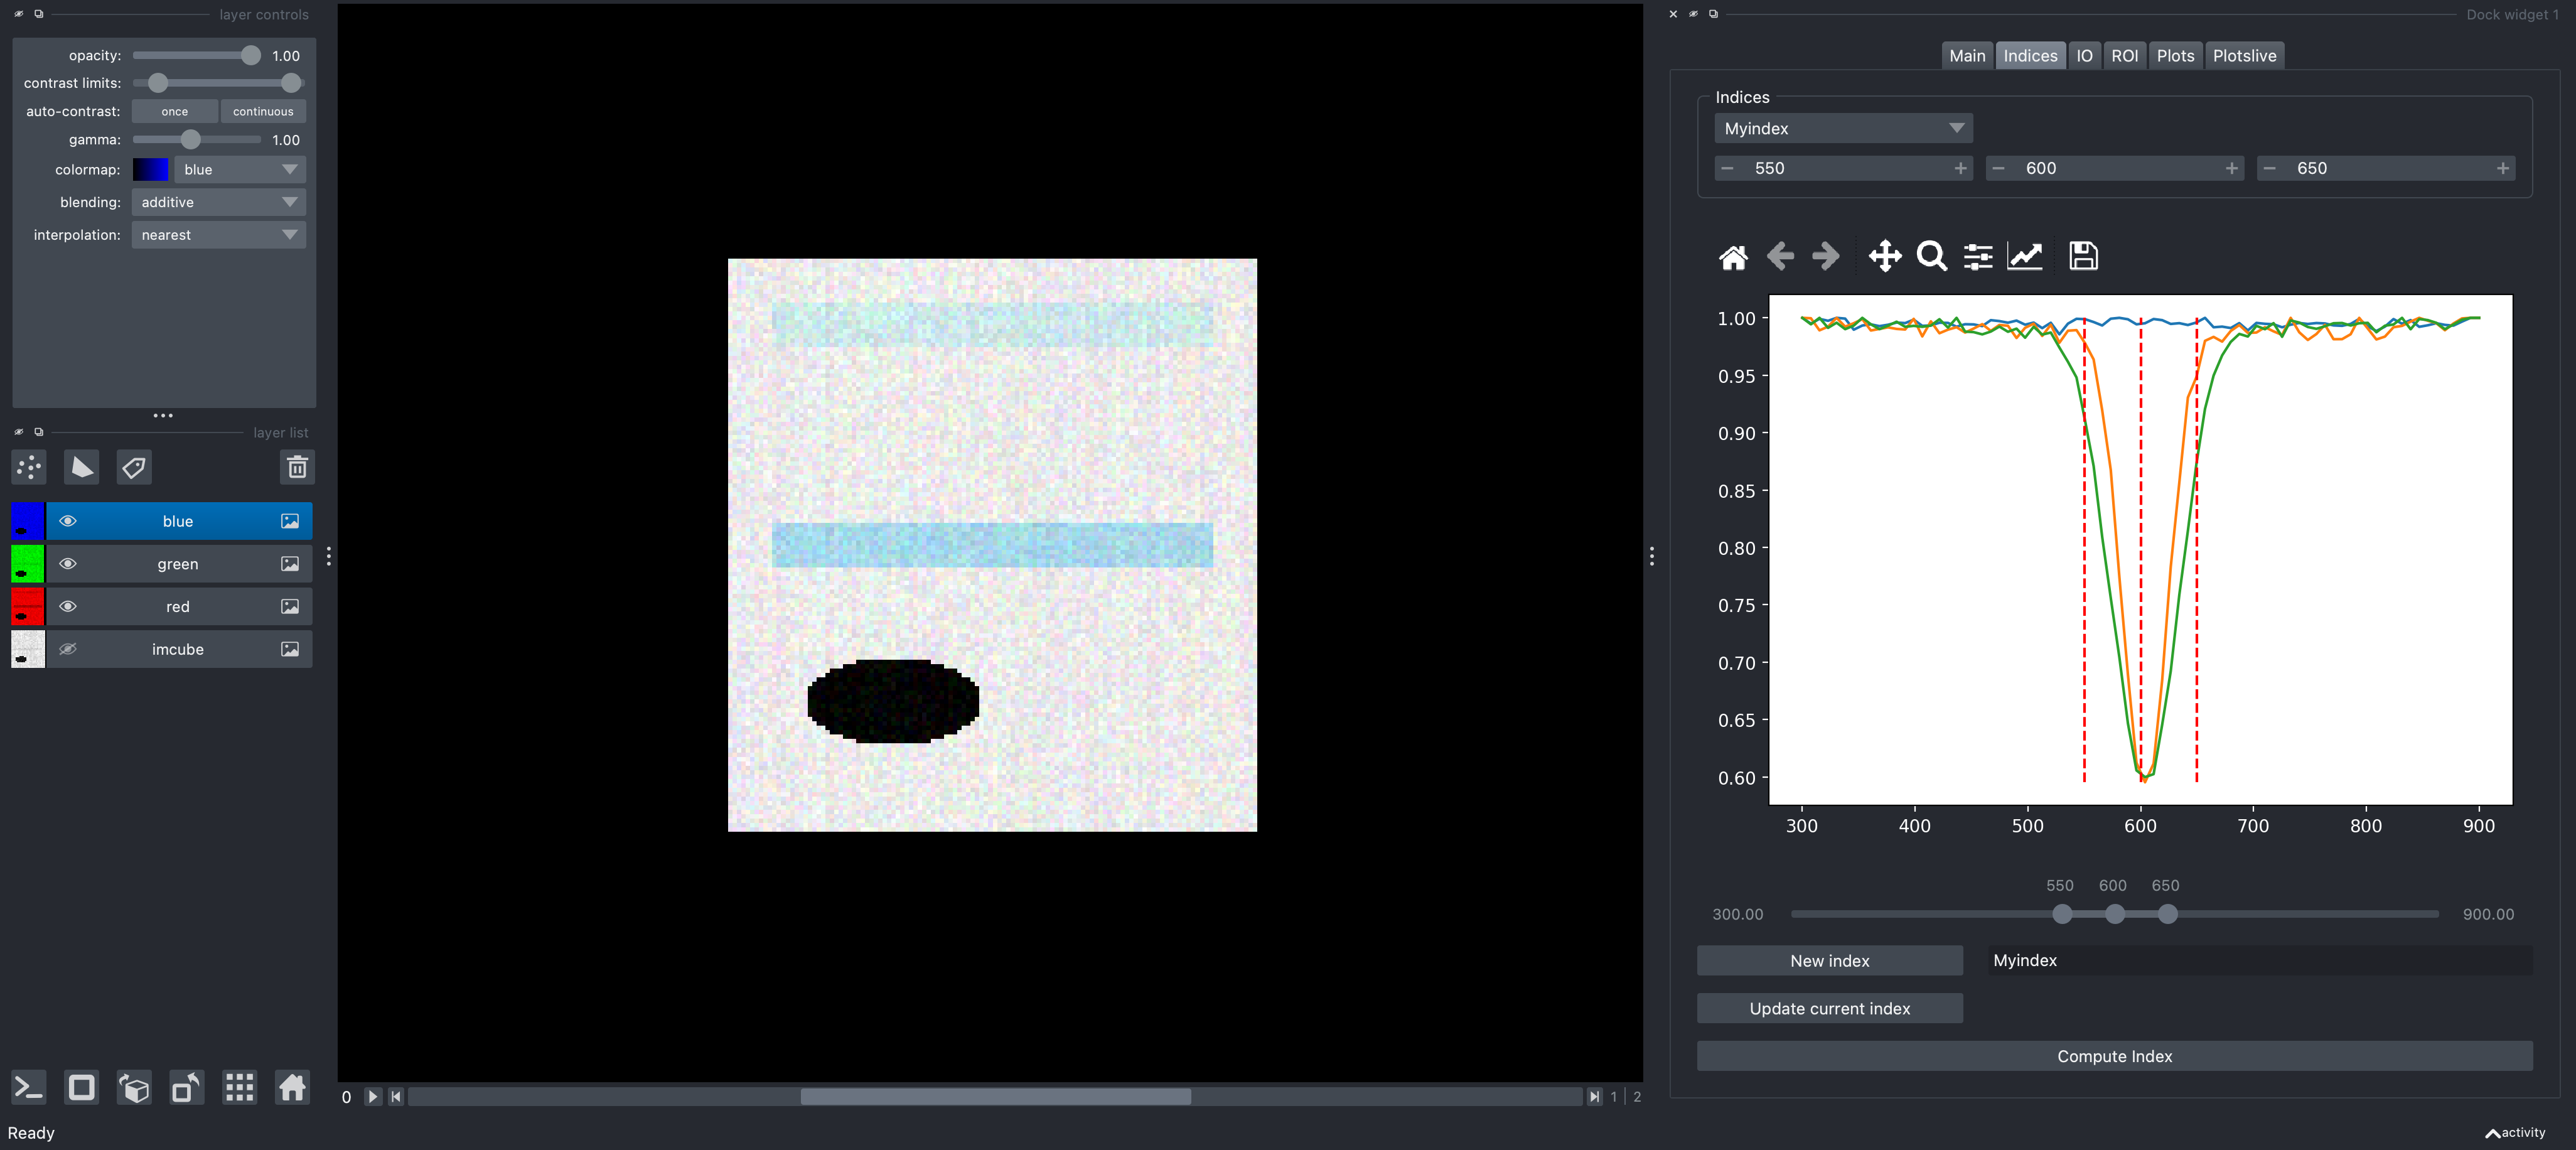

In [28]:
self.tabs.setCurrentIndex(1)
nbscreenshot(viewer)

Once boundaries for index calculation are set, one can compute the index for the entire image by using ```Computer index```.

## IO

In this tab, one can export a combination of indices as a CSV table. The indices to export are selected at the top and the import/export buttons can then be used to save and load such an index list.

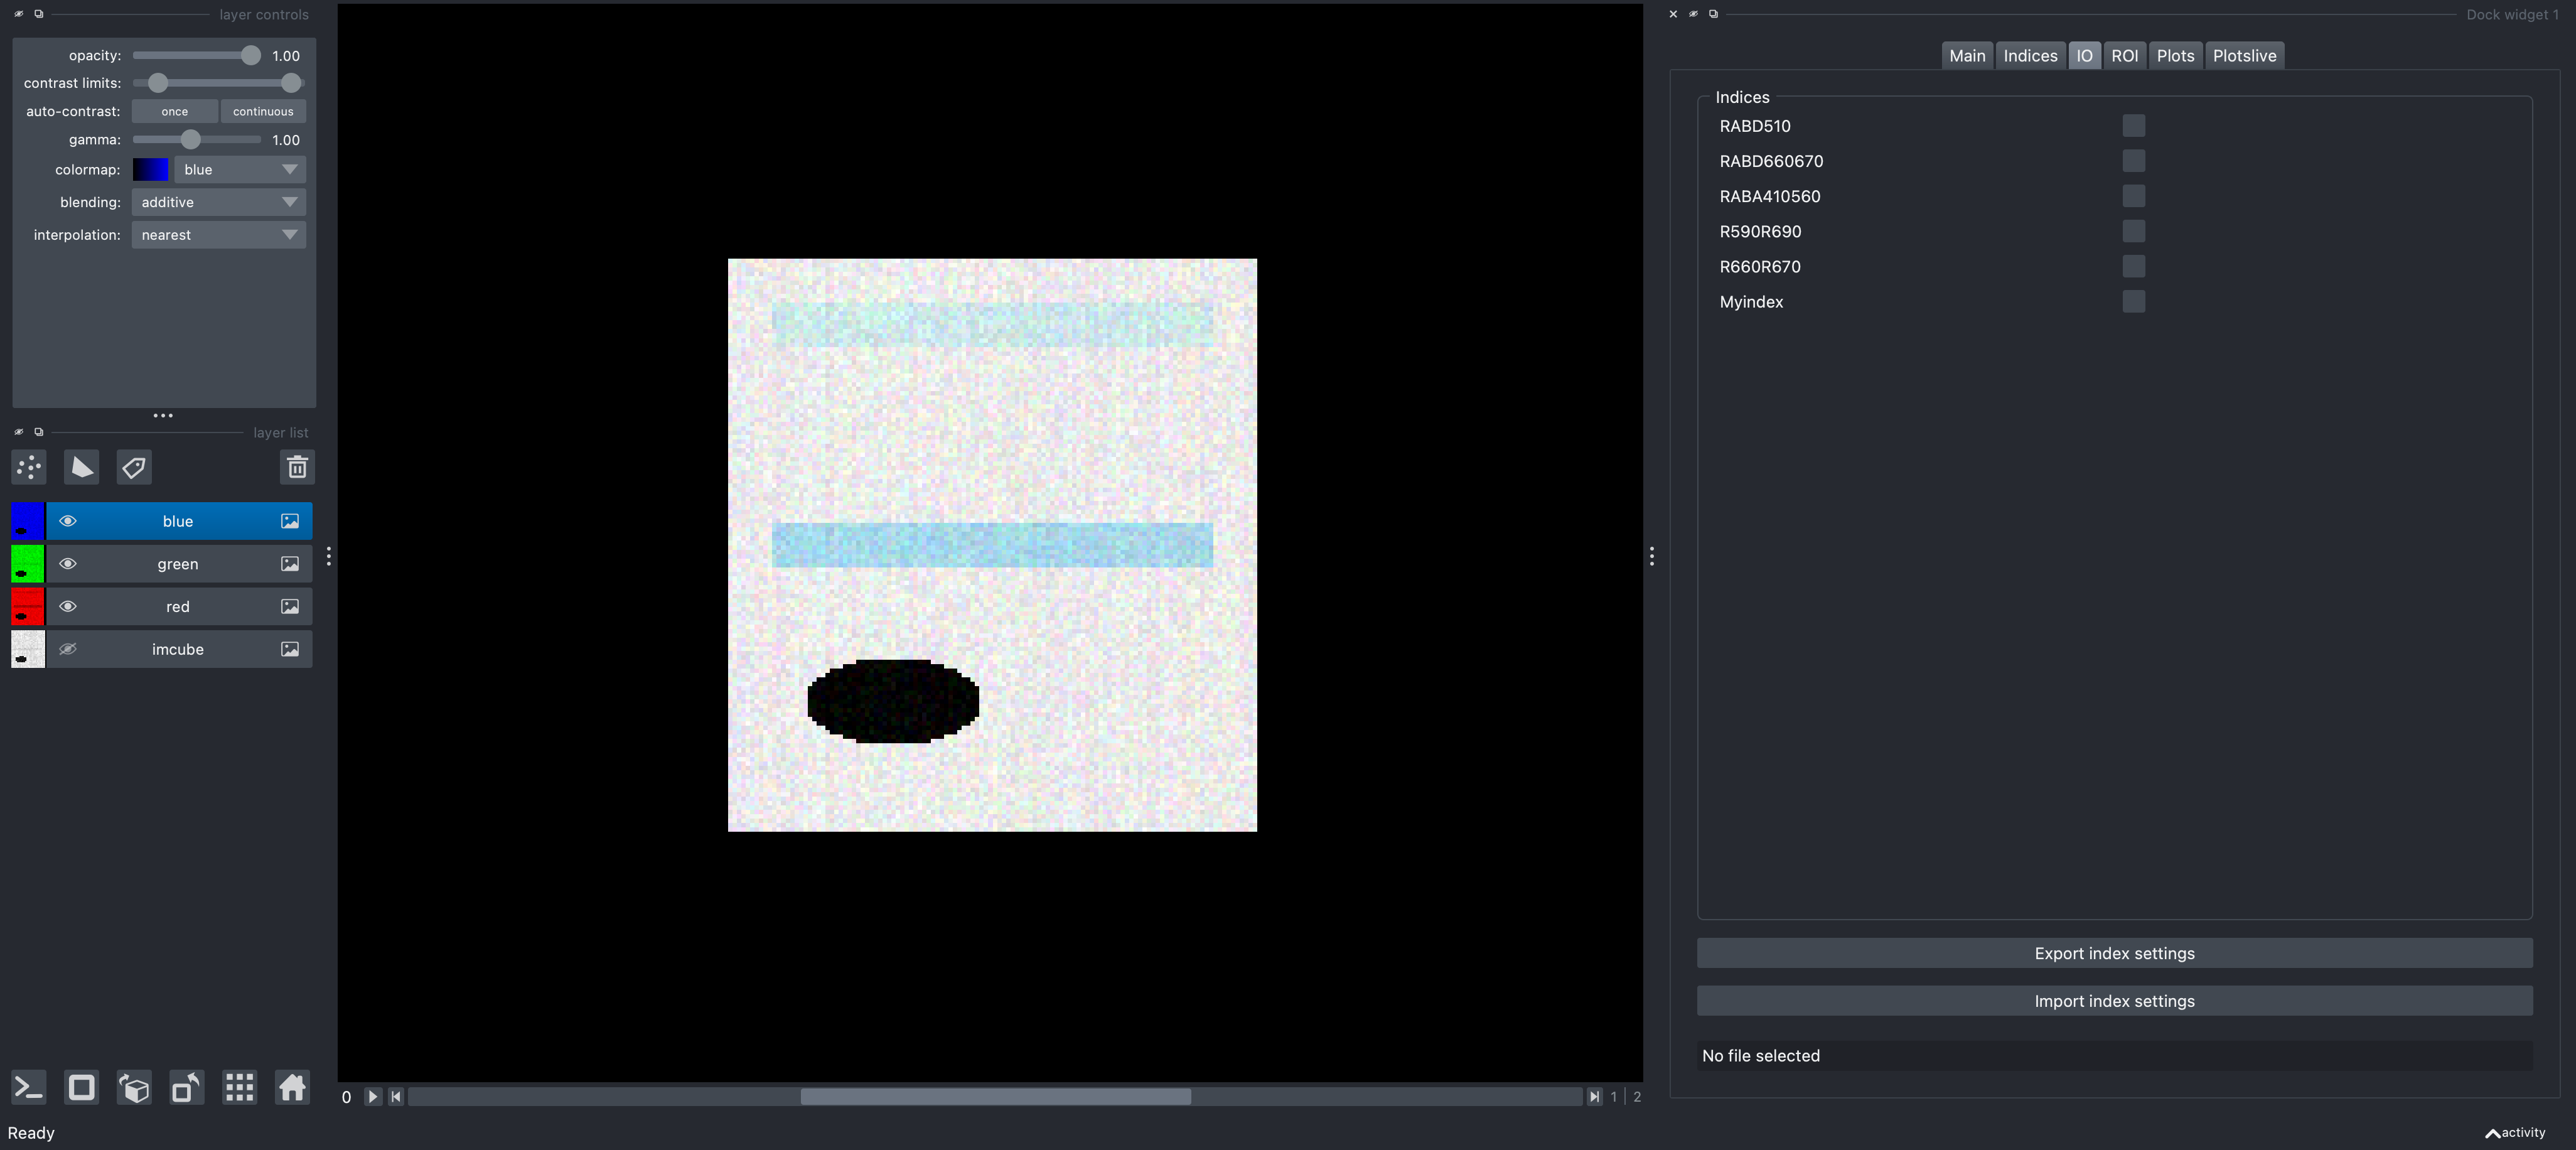

In [29]:
self.tabs.setCurrentIndex(2)
nbscreenshot(viewer)

## ROI

In order to create a index plot, one needs to compute an average index within a region of interest. In this tab one can set the width of such a region and then double-click in the viewer to place it.

In [30]:
self._add_analysis_roi(roi_xpos=80)

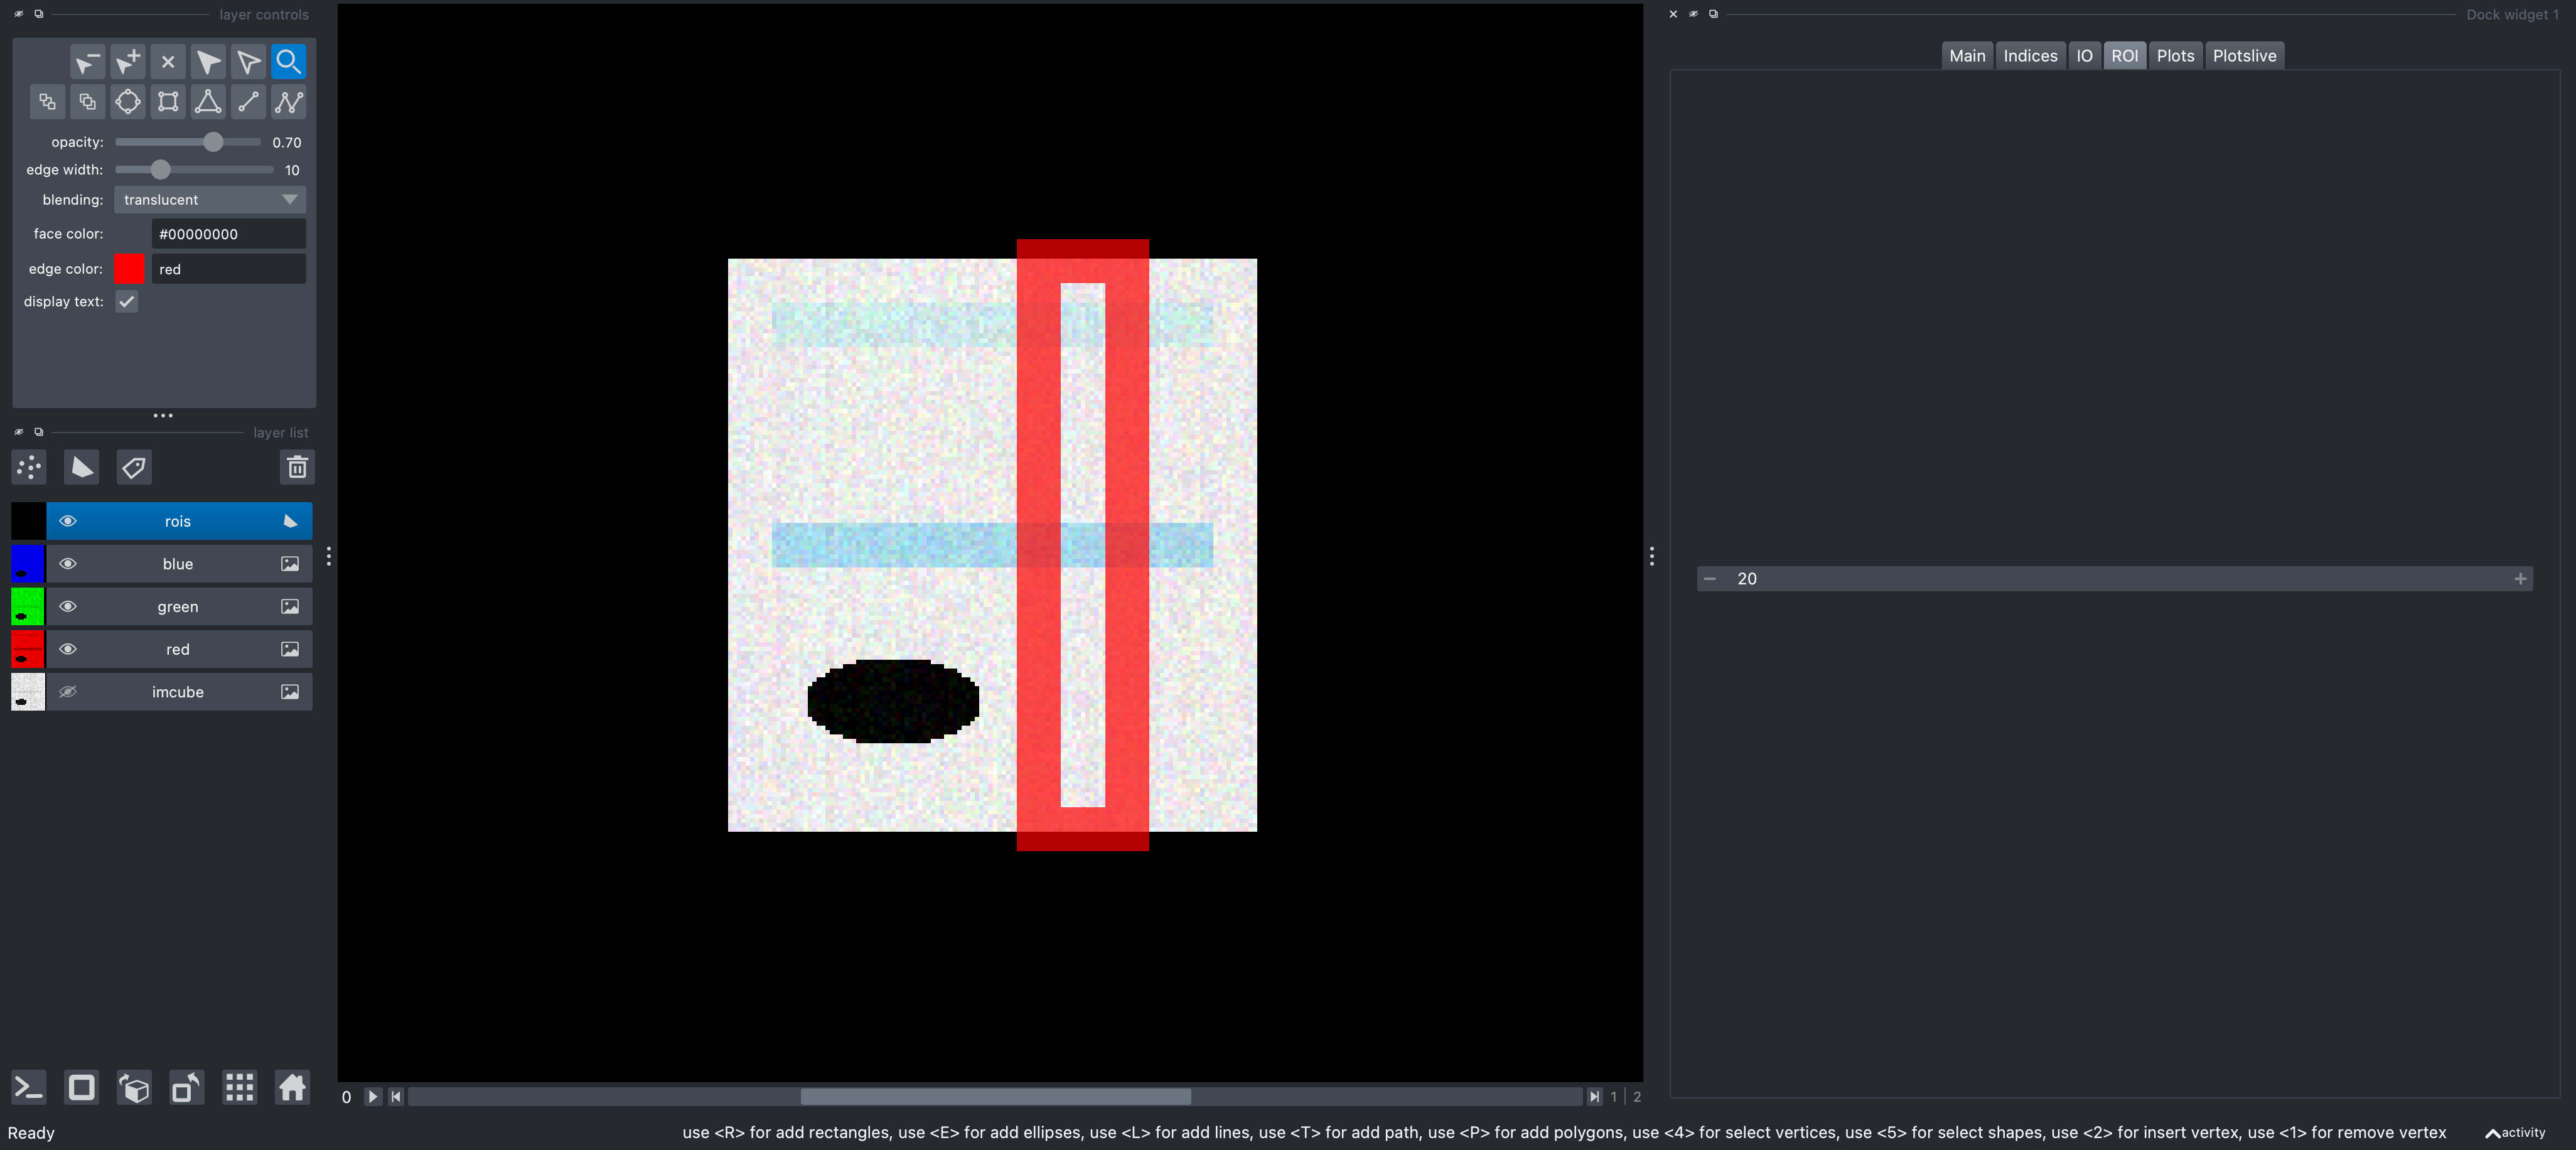

In [31]:
self.tabs.setCurrentIndex(3)
nbscreenshot(viewer)

## Plots

In this tab one can finally visualize a standard "index plot" showing the full image, the selected roi and the average index within that roi. A series of plot adjustments can be done directly in that tag:
- L/R or B/T margin fraction: fraction of plot dedicated to left/right or bottom/top margin
- Plot width fraction: fraction of plot occupied by line plot on the right
- Font factor: adjust font size
- Select plot line color and Plot line thickness: adjusting plot line aspect
- Figure size factor: control figure size (larger figures take longer to update)
- Scale font size: control size of scalebar font

What is displayed in the plugin is a low resolution example of the image to be exported. The real image is then exported using the ```Save plot``` button.

Additionally, one can save/load a parameters file with pre-sets for a given plot to avoid having to reset them manually all the time.

In [32]:
self.tabs.setCurrentIndex(4)

In [18]:
self.spin_figure_size_factor.setValue(10)
self.spin_font_factor.setValue(0.3)
self.spin_bottom_top_margin_fraction.setValue(0.3)
self.spin_plot_image_w_fraction.setValue(0.5)
self.viewer.layers['Myindex'].colormap = 'magma'

In [19]:
self.create_index_plot()

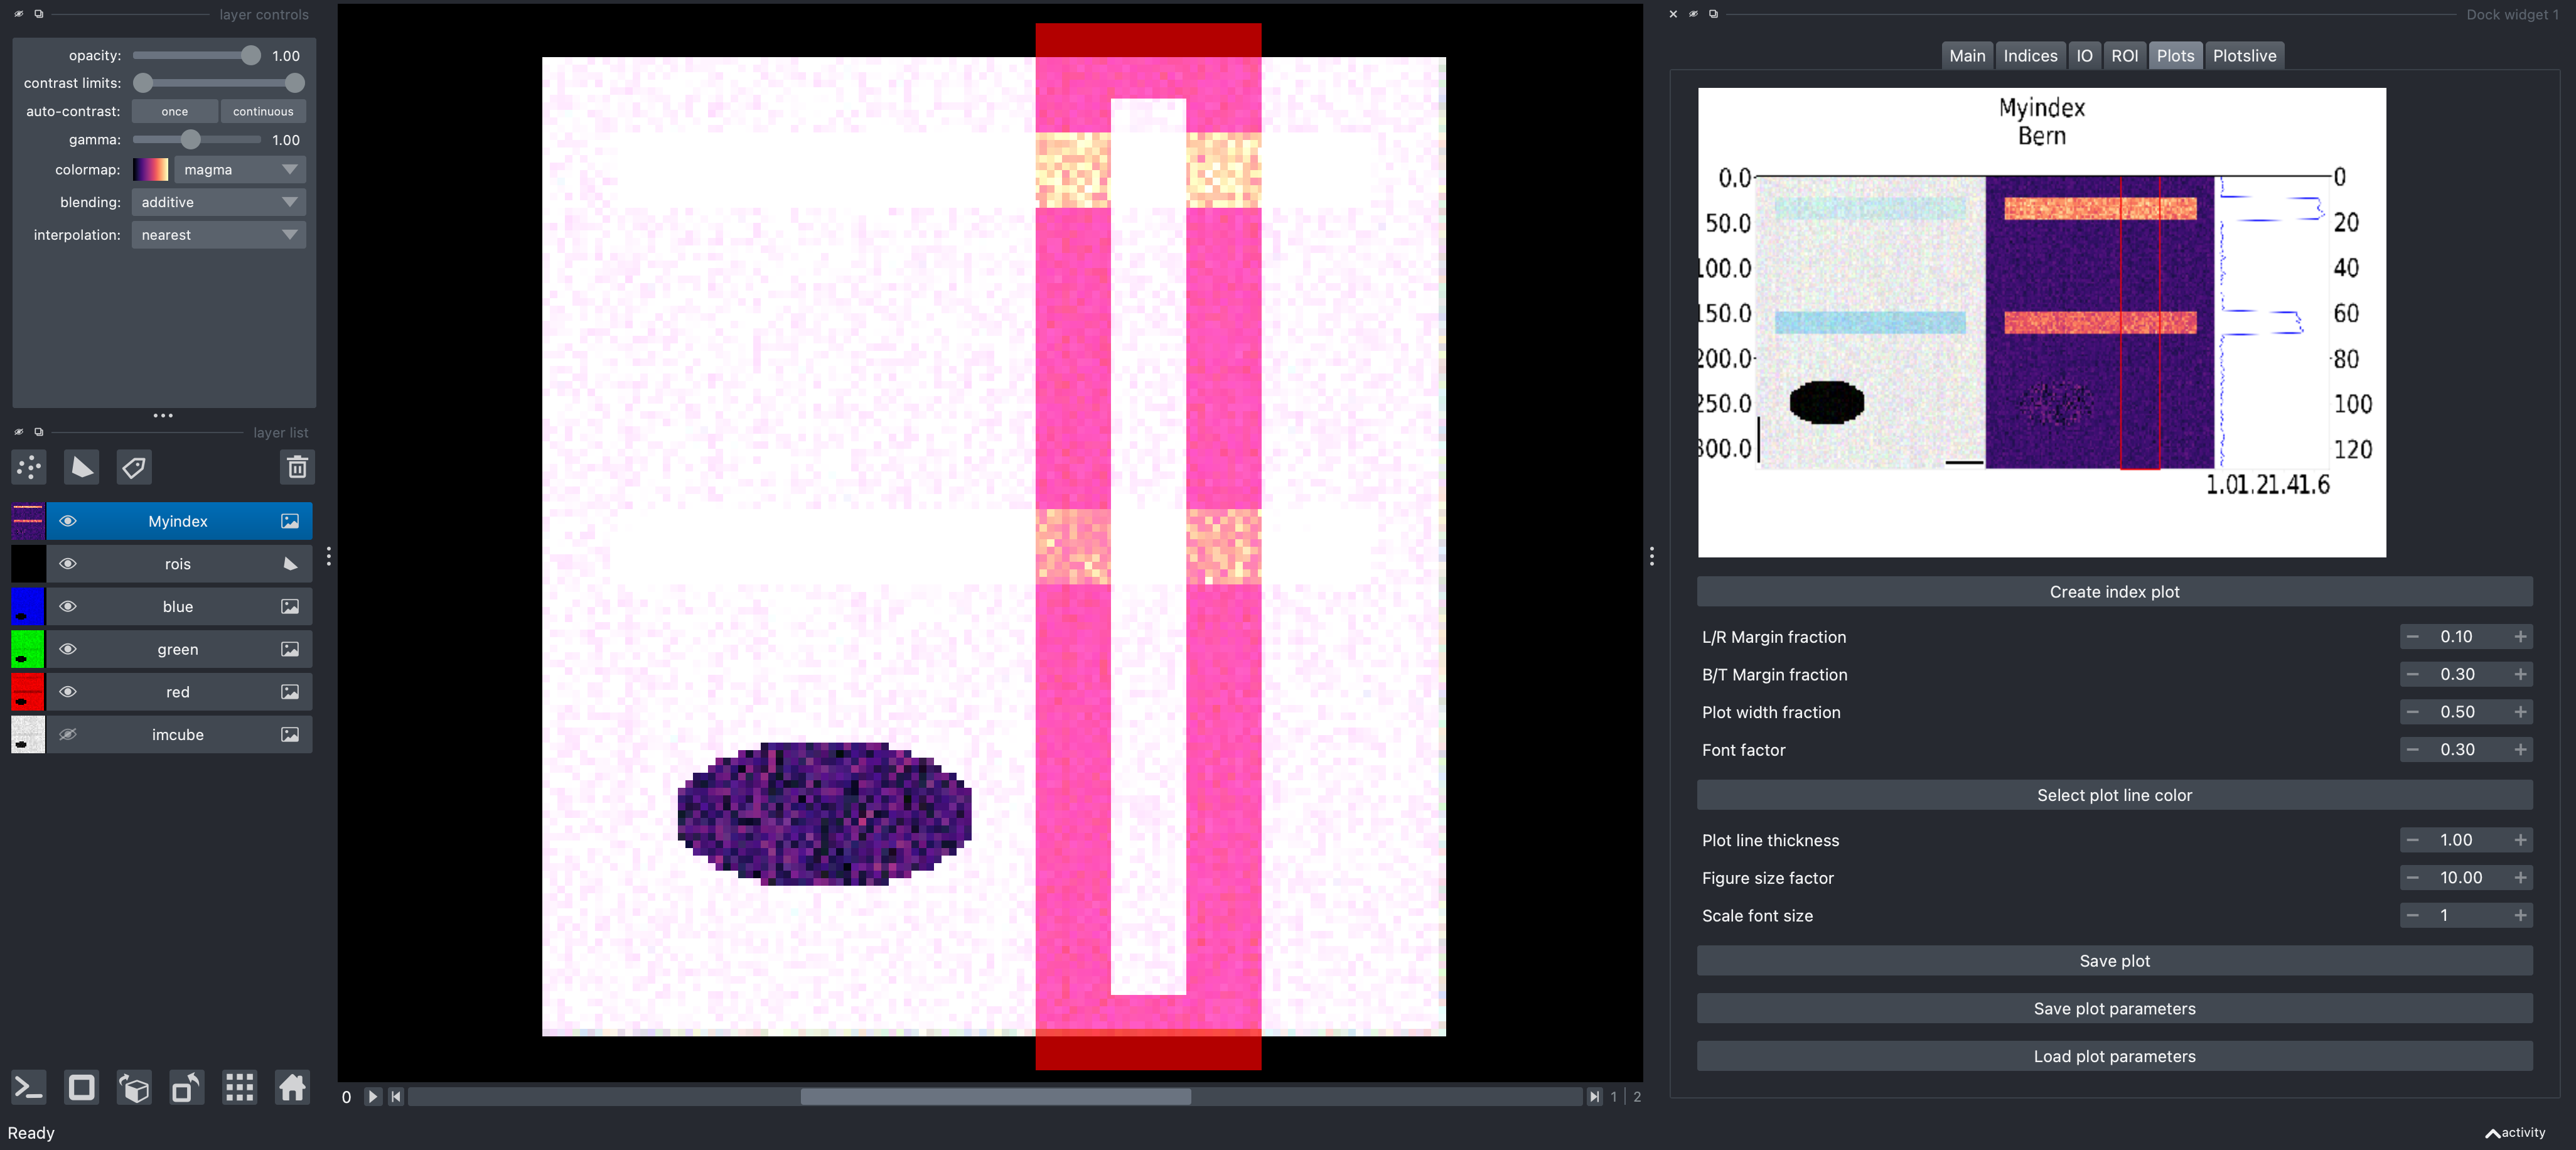

In [20]:
nbscreenshot(viewer)

In [21]:
self._on_click_save_plot_parameters(file_path=export_folder.joinpath('myplotsettings.yml'))